## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

## Data loading

In [2]:
# define the path and assign data frame to the "df" variable

path = r'C:\Users\Jakov\Achievement 6'

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'boat_data_cleaned.csv'), index_col = 0)

## Data preparation

In [3]:
df.isnull().sum()

boat_type               0
manufacturer         1338
type                    6
year_built              0
length                  9
width                  56
material             1749
location               36
views_last_7_days       0
old_currency            0
price_euro              0
country                33
dtype: int64

In [4]:
df = df[df['width'].notnull()] # filter out all rows where "width" is null

In [5]:
df.shape

(9832, 12)

In [6]:
df = df[df['year_built'] > 0] # filter out all rows where "year_built" is 0

In [7]:
df[df['year_built'] == 0]

,boat_type,manufacturer,type,year_built,length,width,material,location,views_last_7_days,old_currency,price_euro,country


In [8]:
df.isnull().sum()

boat_type               0
manufacturer         1272
type                    5
year_built              0
length                  0
width                   0
material             1631
location               36
views_last_7_days       0
old_currency            0
price_euro              0
country                33
dtype: int64

In [9]:
df.describe()

,year_built,length,width,views_last_7_days,price_euro
count,9282.000000,9282.000000,9282.000000,9282.000000,9.282000e+03
mean,2004.922431,11.752063,3.558964,150.154169,3.046043e+05
std,16.377602,6.030722,1.218831,154.863751,9.394920e+05
min,1885.000000,1.040000,0.010000,13.000000,3.300000e+03
25%,1999.000000,7.570000,2.550000,70.000000,4.499125e+04
50%,2008.000000,10.500000,3.400000,108.000000,9.666543e+04
75%,2018.000000,14.000000,4.270000,172.000000,2.500000e+05
max,2021.000000,100.000000,25.160000,3263.000000,3.100000e+07


In [10]:
df[df['width'] == 0.01]

,boat_type,manufacturer,type,year_built,length,width,material,location,views_last_7_days,old_currency,price_euro,country
3107,Motor Yacht,NaN,"new boat from stock,Diesel",2020,12.8,0.01,PVC,France,34,EUR,812000.0,France


In [11]:
# extract rows which share similar values to the row where width is 0.01

dfw = df[(df['boat_type'].isin(['Motor Yacht'])) & 
         (df['year_built'] > 2010) & 
         (df['length'].between(10.8, 14.8, inclusive="both")) & 
         (df['width'] > 0.01)]
dfw.shape

(269, 12)

In [12]:
# find out the mean width of the boats which have similar values to the boat with the width of 0.01

dfw_grouped = dfw.groupby('boat_type').agg({'width': 'mean'})
dfw_grouped = dfw_grouped.reset_index()

In [13]:
dfw_grouped.iloc[0]['width'] # get the mean width

3.8820446096654275

In [14]:
# impute the mean width where the width is 0.01

df.loc[(df['width'] == 0.01, 'width')] = round(dfw_grouped.iloc[0]['width'], 2)

In [15]:
# store only numerical variables in the df_num variable

df_num = df[['year_built', 'length', 'width', 'views_last_7_days', 'price_euro']]

In [16]:
df_num.head(5)

,year_built,length,width,views_last_7_days,price_euro
0,2017,4.00,1.90,226,3493.24
1,2020,4.00,1.50,75,3490.00
3,2020,3.00,1.00,64,3475.67
4,2019,3.55,1.46,58,3399.00
6,1999,6.20,2.38,474,3768.55


## The elbow technique

In [17]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [18]:
score = [kmeans[i].fit(df_num).score(df_num) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\Jakov\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jakov\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jakov\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jakov\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jakov\anaconda3\lib\site-packages\sklearn\clust

[-8191831304807976.0,
 -3384053915793778.0,
 -1958203581486845.8,
 -1102587194328826.2,
 -757442054993819.8,
 -513566418978303.94,
 -371373850717972.7,
 -275362849493233.8,
 -212269536797787.34]

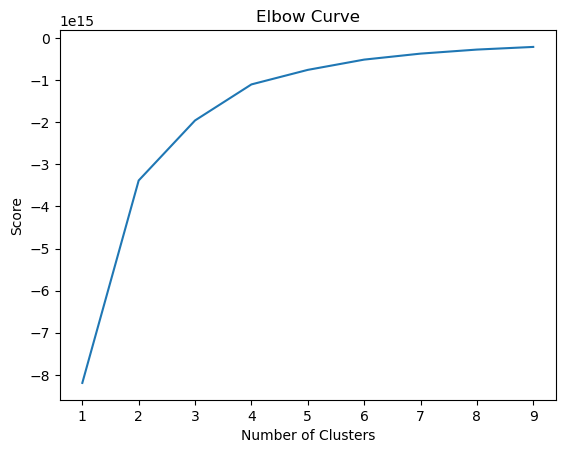

In [19]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### The breaking point of this curve is at the value of 4 on the x-axis, where the curve starts to flatten out. Which means that 4 is the optimal count of clusters for this data set.

## K-means clustering

In [20]:
# create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [21]:
# fit the k-means object to the data.

kmeans.fit(df_num)

C:\Users\Jakov\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [22]:
# create a new column "clusters" to see in which cluster each row belongs

df_num['clusters'] = kmeans.fit_predict(df_num)

C:\Users\Jakov\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jakov\AppData\Local\Temp\ipykernel_13048\1237368330.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['clusters'] = kmeans.fit_predict(df_num)


In [23]:
df_num['clusters'].value_counts()

0    8815
2     394
1      65
3       8
Name: clusters, dtype: int64

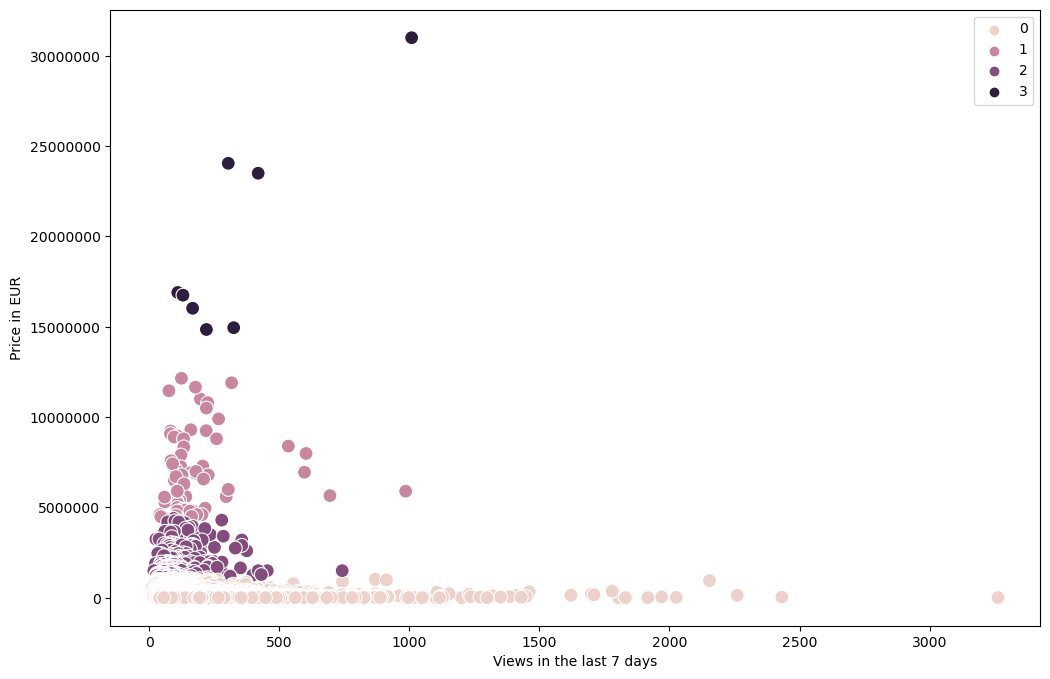

In [24]:
# Plot the clusters for the "price_euro" and "views_last_7_days" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['views_last_7_days'], y=df_num['price_euro'], hue=kmeans.labels_, s=100) 

# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Views in the last 7 days') # Label x-axis.
plt.ylabel('Price in EUR') # Label y-axis.
# set the formatter for the y-axis to display numbers without scientific notation
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

### The first cluster contains boats with the lowest price, between 0 and 1 mil EUR, and about top 20 most viewed boats (1250 - 3100 views) belong to the first cluster. The third cluster contains boats with the price between 1.5 and 5 mil EUR, and those boats have between 0 and 500 views. The second cluster contains boats with the price between 4.8 and 12.5 mil EUR, and those boats usually get between 0 and 400 views. Only 5 boats of that cluster have between 500 and 1000 views. The last cluster only has 8 boats, their price is between 15 and 31 mil EUR. Only 1 out of 8 has about 1000 views, the rest have between 0 and 500 views.

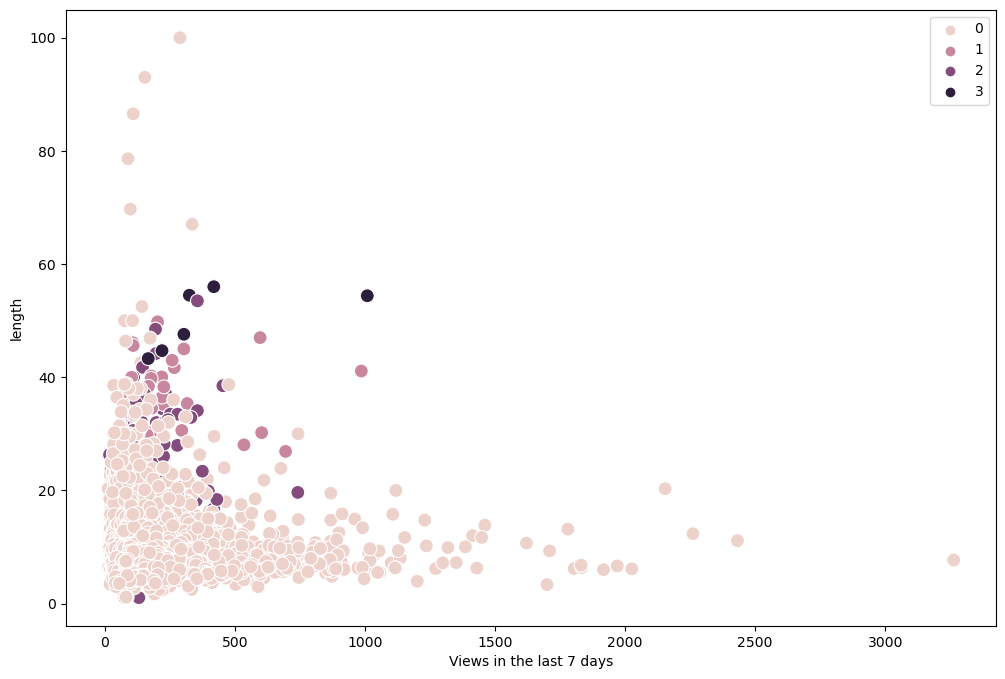

In [67]:
# Plot the clusters for the "views_last_7_days" and "length" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['views_last_7_days'], y=df_num['length'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Views in the last 7 days') 
plt.ylabel('length') 
plt.show()

### Here, clusters are overlapping. Which means that datapoints (boats) can not be seperated into groups based on views and length.

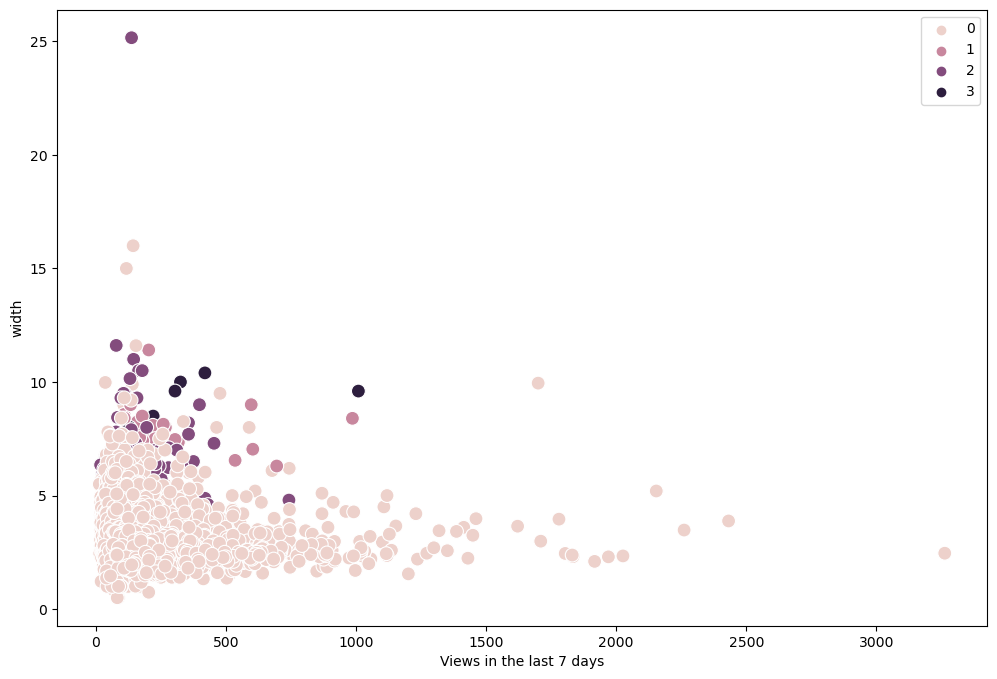

In [68]:
# Plot the clusters for the "views_last_7_days" and "width" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['views_last_7_days'], y=df_num['width'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Views in the last 7 days') 
plt.ylabel('width') 
plt.show()

### Here, clusters are overlapping too. Which means that datapoints (boats) can not be seperated into groups based on views and width.

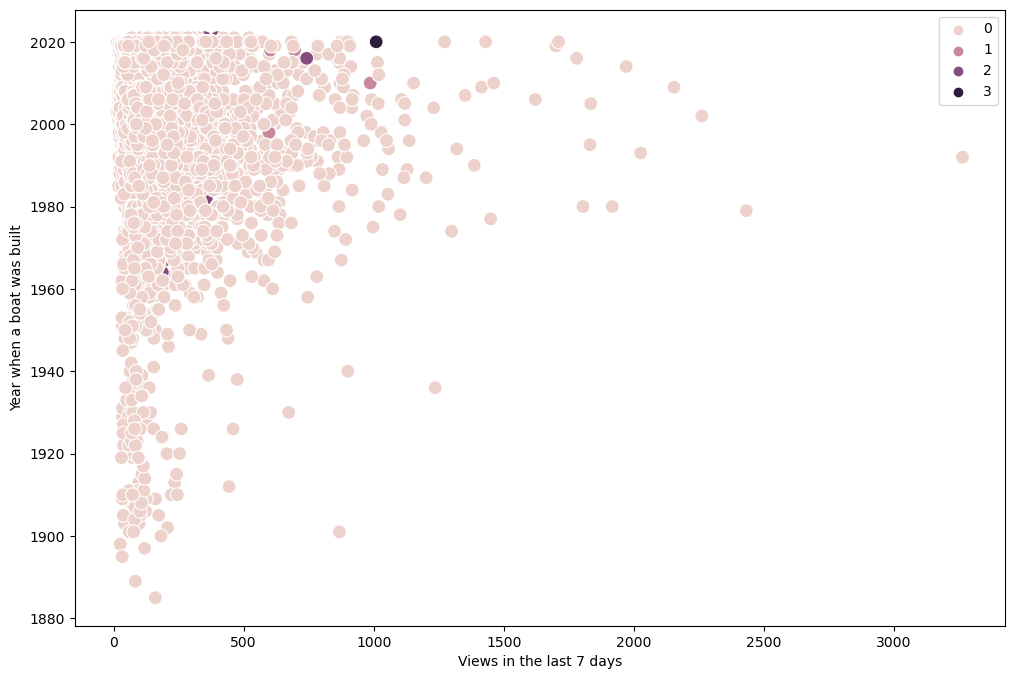

In [70]:
# Plot the clusters for the "views_last_7_days" and "year_built" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['views_last_7_days'], y=df_num['year_built'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Views in the last 7 days') 
plt.ylabel('Year when a boat was built') 
plt.show()

### Here, clusters are overlapping again. Which means that datapoints (boats) can not be seperated into groups based on views and a year when a boat was built.

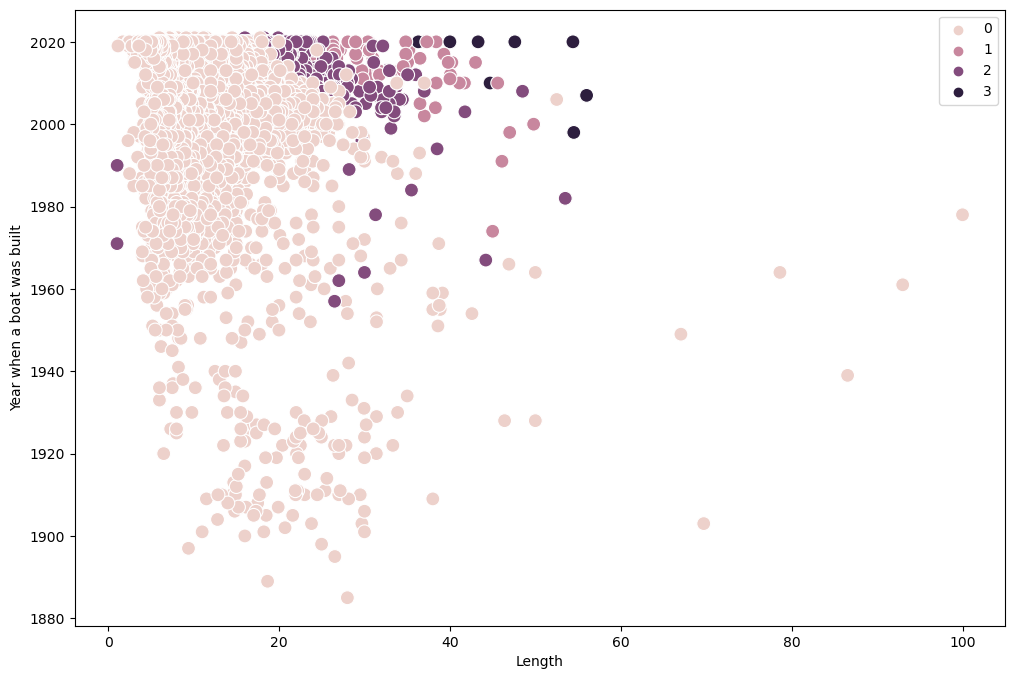

In [71]:
# Plot the clusters for the "length" and "year_built" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['length'], y=df_num['year_built'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Length') 
plt.ylabel('Year when a boat was built') 
plt.show()

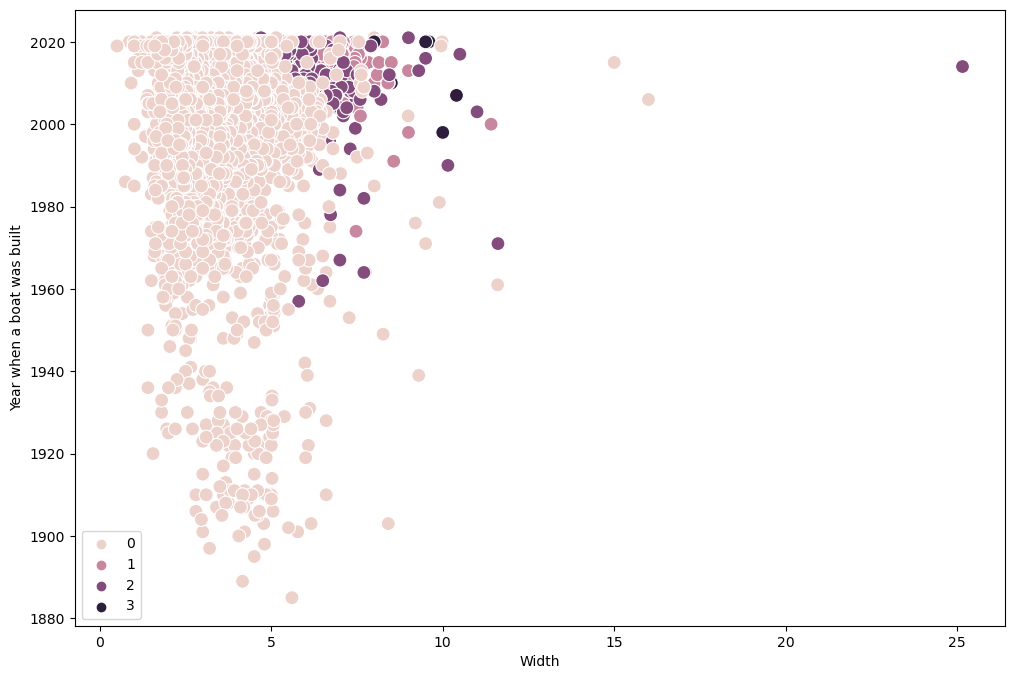

In [72]:
# Plot the clusters for the "width" and "year_built" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['width'], y=df_num['year_built'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Width') 
plt.ylabel('Year when a boat was built') 
plt.show()

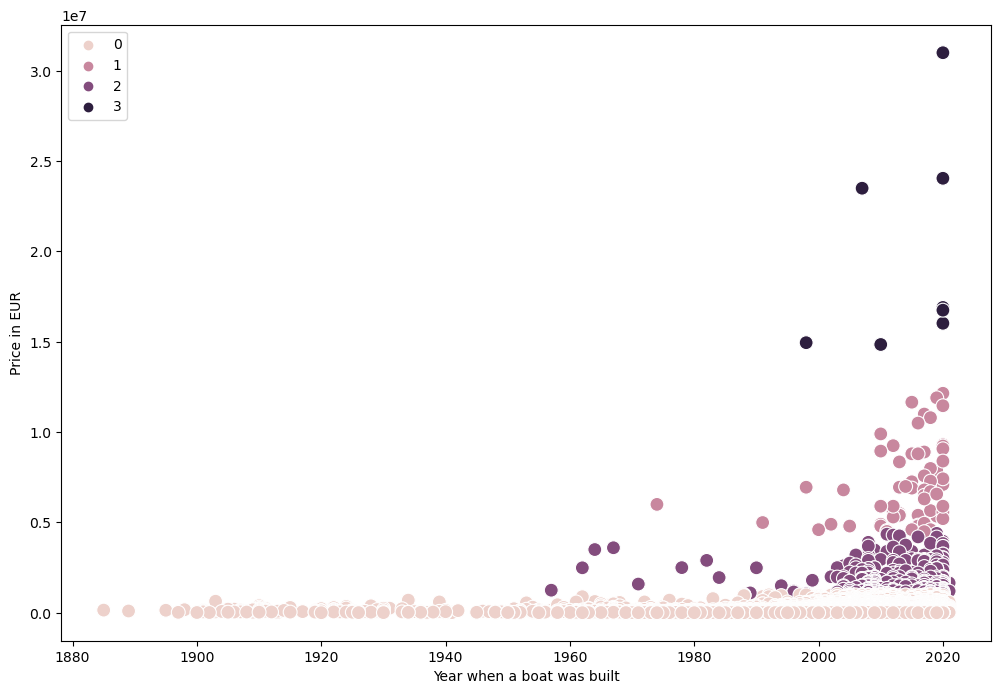

In [74]:
# Plot the clusters for the "price_euro" and "year_built" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['year_built'], y=df_num['price_euro'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Year when a boat was built') 
plt.ylabel('Price in EUR') 
plt.show()

### Here, one can see that before around 1997, those more expensive (>10.5 mil EUR) boats did not exist.

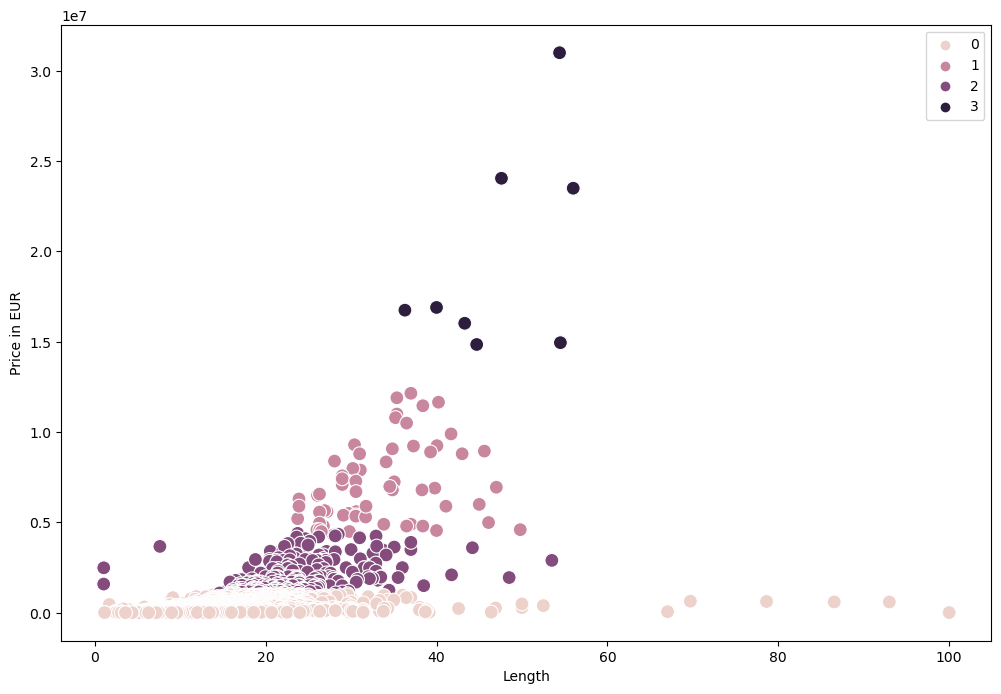

In [25]:
# Plot the clusters for the "price_euro" and "length" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['length'], y=df_num['price_euro'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Length') 
plt.ylabel('Price in EUR') 
plt.show()

### The fourth cluster, which has top 8 most expensive boats, does not contain boats with the length below 36-37m. The second cluster, which, after the fourth cluster, has most expensive boats, does not contain boats with the length below 22-23m. Other two clusters, which are below price-wise, have boats with the length lesser than 20m.

## 09. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [29]:
df_num.loc[df_num['clusters'] == 3, 'cluster'] = 'Luxury'
df_num.loc[df_num['clusters'] == 2, 'cluster'] = 'Moderate Budget'
df_num.loc[df_num['clusters'] == 1, 'cluster'] = 'High Budget'
df_num.loc[df_num['clusters'] == 0, 'cluster'] = 'Low Budget'

In [27]:
df_num.groupby('cluster').agg({'year_built':['mean', 'median', 'min', 'max'], 
                           'length':['mean', 'median', 'min', 'max'], 
                           'width':['mean', 'median', 'min', 'max'],
                           'price_euro':['mean', 'median', 'min', 'max'],
                           'views_last_7_days':['mean', 'median', 'min', 'max']})

year_built                         length                        \
                    mean  median   min   max       mean  median    min    max   
cluster                                                                         
black        2014.375000  2020.0  1998  2020  47.100000  46.150  36.30   56.0   
dark purple  2012.195431  2013.0  1957  2021  22.974188  22.375   1.04   53.5   
pink         2004.522292  2007.0  1885  2021  11.058412  10.100   1.15  100.0   
purple       2013.938462  2016.0  1974  2020  33.448000  31.700  23.75   49.8   

                width                       price_euro                \
                 mean median  min    max          mean        median   
cluster                                                                
black        9.225000   9.55  8.0  10.40  1.975312e+07  1.682500e+07   
dark purple  5.873959   5.60  4.0  25.16  1.895201e+06  1.652352e+06   
pink         3.422886   3.30  0.5  16.00  1.666184e+05  8.900000e+04   
purple       7.342923   7.26  6.0  11.41  6.982498e+06  6.571715e+06   

                                    views_last_7_days                    
                    min         max              mean median  min   max  
cluster                                                                  
black        14850000.0  31000000.0        335.500000  262.0  110  1009  
dark purple   1040000.0   4395000.0        108.492386   89.5   18   742  
pink             3300.0   1027774.0        151.582189  108.0   13  3263  
purple        4489870.0  12150000.0        186.215385  133.0   41   986

In [30]:
# save exploded df_num in a new csv file

df_num.to_csv(os.path.join(path, '02 Data','Prepared Data', 'df_num.csv'))

### The black cluster has the newest, longest, widest, most viewed (on the average) and most expensive boats. It probably has only mega yachts that were built most recently. The purple cluster comes after the black cluster in all categories. The dark purple cluster comes after the purple cluster, and has better stats than pink cluster by most categories except the "views_last_7_days". The dark purple cluster consists of newer, bigger, more expensive boats compared to the pink cluster, but the pink cluster has more views in the last 7 days on average.

## 10. Propose what these results could be useful for in future steps of an analytics pipeline.

### These results could provide a new direction for the analysis project. Now that we have datapoints grouped into clusters with shared attributes, we could treat each cluster as a new subset and conduct further analysis separately for each one. We can treat these subsets as a stand-alone datasets that share only attributes with each other, not values. After the analysis, we could check and compare how are variables behaving in each cluster. By comparing the results of each cluster, maybe we may find different patterns for the same variables.